In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
pd.set_option('max_columns',100)

In [2]:
# Importing the dataset
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Dropping irrelevant column
dataset.drop(columns='Id',inplace=True)

In [4]:
# NULL values
dataset.isna().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

### Handling Missing Values

In [5]:
# LotFrontage
dataset['LotFrontage'] = dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

In [6]:
# Alley
dataset['Alley'] = dataset['Alley'].fillna('None')

In [7]:
# MasVnrType
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('CBlock')

In [8]:
# MasVnrArea
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [9]:
# 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'
Bsmt_cols = ['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']
for col in Bsmt_cols:
    dataset[col] = dataset[col].fillna('None')

In [10]:
# Electrical
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [11]:
# FireplaceQu
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna('None')

In [12]:
# 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual'
garage_cols = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
for cols in garage_cols:
    dataset[cols] = dataset[cols].fillna('None')

In [13]:
# GarageYrBlt
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(0)

In [14]:
# 'PoolQC','MiscFeature', 'Fence'
none_cols = ['PoolQC','MiscFeature', 'Fence']
for cols in none_cols:
    dataset[cols] = dataset[cols].fillna('None')

### Checking dtype of each column

In [15]:
# Chaning 'object' dtype to 'category'
dtype_col = dataset.select_dtypes(include='object').columns
for cols in dtype_col:
    dataset[cols] = dataset[cols].astype('category')

In [16]:
# MSSubClass, OverallQual, OverallCond, MoSold, YrSold
change_dtype_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'MoSold', 'YrSold']
for cols in change_dtype_col:
    dataset[cols] = dataset[cols].astype('category')

### Coverting into labels using LabelEncoder

In [17]:
labelenc_col = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
                'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
                'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
                'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
                'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
                'SaleCondition']

In [18]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in labelenc_col:
    labelencoder_X.fit(list(dataset[i].values))
    dataset[i] = labelencoder_X.transform(list(dataset[i].values))

### Feature Engineering

In [19]:
# Adding important features

dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']
dataset['TotalBath'] = dataset['BsmtFullBath'] + dataset['BsmtHalfBath'] + dataset['FullBath'] + dataset['HalfBath']
dataset['HouseAge'] = 2020 - dataset['YearRemodAdd']
dataset['GarageAge'] = 2020 - dataset['GarageYrBlt']

### Changing into their respective dtype

In [20]:
for cols in dtype_col:
    dataset[cols] = dataset[cols].astype('category')
    
for cols in change_dtype_col:
    dataset[cols] = dataset[cols].astype('category')

### Checking outliers

AxesSubplot(0.125,0.536818;0.352273x0.343182)


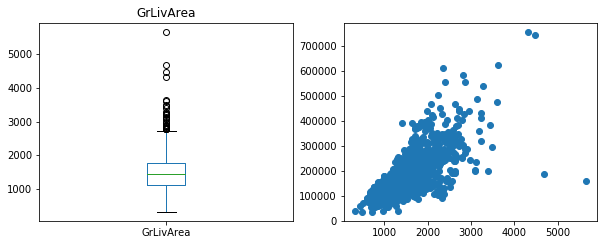

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
print(dataset['GrLivArea'].plot(kind='box', title = 'GrLivArea'))
plt.subplot(2,2,2)
plt.scatter(dataset['GrLivArea'],dataset['SalePrice'])

In [22]:
crit1 = (dataset['GrLivArea'] > 4000) & (dataset['SalePrice'] < 300000)
dataset.drop(index = dataset[crit1].iloc[:,0].index, inplace=True)

In [23]:
outlier_col = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                '2ndFlrSF', 'GrLivArea', 'GarageArea', 'TotalSF']

AxesSubplot(0.125,0.536818;0.352273x0.343182)
AxesSubplot(0.125,0.125;0.352273x0.343182)


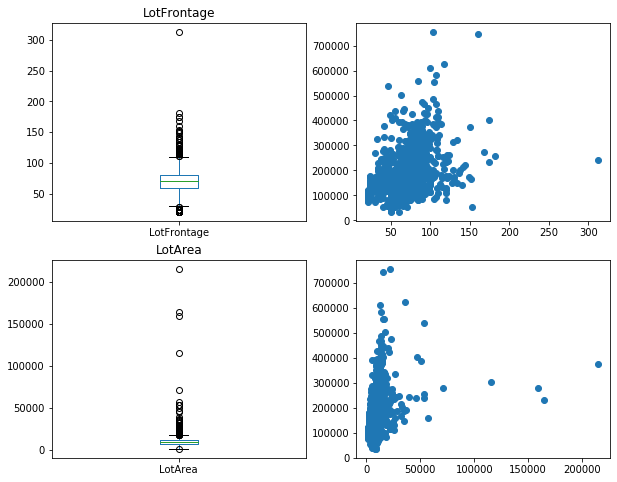

In [24]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
print(dataset['LotFrontage'].plot(kind='box', title = 'LotFrontage'))
plt.subplot(2,2,2)
plt.scatter(dataset['LotFrontage'],dataset['SalePrice'])

plt.subplot(2,2,3)
print(dataset['LotArea'].plot(kind='box', title = 'LotArea'))
plt.subplot(2,2,4)
plt.scatter(dataset['LotArea'],dataset['SalePrice'])

### Checking Skewness

In [25]:
y = np.log1p(dataset['SalePrice'])
X = dataset.drop(columns='SalePrice')

In [26]:
skew_col = X.select_dtypes(exclude='category').columns

In [27]:
skewed_values = X[skew_col].apply(lambda x: x.skew()).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew':skewed_values})
skewness.head(10)

,Skew
MiscVal,24.460085
PoolArea,15.948945
LotArea,12.573925
3SsnPorch,10.297106
LowQualFinSF,9.004955
KitchenAbvGr,4.484883
BsmtFinSF2,4.251925
ScreenPorch,4.118929
BsmtHalfBath,4.100114
GarageAge,3.866380


### Transforming features

In [28]:
# Box-Cox Transformation
skewness = skewness[(skewness['Skew'] > 0.75) | (skewness['Skew'] < - 0.75)]

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for i in skewed_features:
    X[i] = boxcox1p(X[i],lam)

In [29]:
X.drop(columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], inplace=True)

In [30]:
X = pd.get_dummies(X, drop_first = True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Run the Models

In [32]:
# Lasso

In [33]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
#ls = make_pipeline(RobustScaler(),Lasso(alpha = 0.00025, random_state = 1))
ls = Lasso(alpha = 0.00025, max_iter = 10000,random_state = 1)
ls.fit(X_train, y_train)

Lasso(alpha=0.00025, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=1,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
y_predict = ls.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test, y_predict))

0.11281715230766774

In [36]:
# RMSLE

In [37]:
y_test = y_test.reset_index().drop(columns='index')

In [38]:
y_test = y_test['SalePrice']

In [39]:
Y_test_e = []
Y_predict_e = []

for i in range(0, len(y_test)):
    Y_test_e.append(math.exp(y_test[i]))
    Y_predict_e.append(math.exp(y_predict[i]))
    
log_sq_sum = 0.0
for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(y_test))

print(rmsle)

0.11281629595121313


In [40]:
# XGBoost

In [41]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [42]:
y_predict = xgb.predict(X_test)

In [43]:
math.sqrt(mean_squared_error(y_test, y_predict))

0.12898991176329183

In [44]:
# Selecting best variables for Y

In [45]:
# We have selected top 70% variables among all variables.

In [46]:
# Selection Transform of Feature Selection
from sklearn.feature_selection import SelectPercentile,\
                                      f_regression

# Implement SelectPercentile for feature selection

selectorP = SelectPercentile(score_func = f_regression,percentile=70)
x_p = selectorP.fit_transform(X,y)

In [47]:
#y = y.values

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x_p, y, test_size = 0.3, random_state=0)

In [49]:
# XGBoost

In [50]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [51]:
y_predict = xgb.predict(X_test)

In [52]:
math.sqrt(mean_squared_error(y_test, y_predict))

0.12564764633183592

In [53]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
y_predict = lr.predict(X_test)

In [55]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.11968309316012178

In [56]:
# Polynomial Regression
"""
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
"""

'\nfrom sklearn.preprocessing import PolynomialFeatures\npoly_reg = PolynomialFeatures(degree = 2)\nX_train_poly = poly_reg.fit_transform(X_train)\nX_test_poly = poly_reg.fit_transform(X_test)\n'

In [57]:
"""
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)
"""

'\nlr2 = LinearRegression()\nlr2.fit(X_train_poly, y_train)\n'

In [58]:
"""
y_predict_1 = lr.predict(X_test)

math.sqrt(mean_squared_error(y_test, y_predict_1))
"""

'\ny_predict_1 = lr.predict(X_test)\n\nmath.sqrt(mean_squared_error(y_test, y_predict_1))\n'

In [59]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 300, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [60]:
y_predict = rfr.predict(X_test)

In [61]:
np.sqrt(mean_squared_error(y_test, y_predict))

0.1391437625970483

In [62]:
# ANN

In [63]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the keras model
model = Sequential()

In [64]:
# Adding the layers
model.add(Dense(24,input_dim = 201, activation = 'relu',kernel_initializer = 'RandomNormal'))

model.add(Dense(12, activation = 'relu',kernel_initializer = 'RandomNormal'))

model.add(Dense(1, kernel_initializer = 'RandomNormal'))

In [65]:
# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mse'])

In [66]:
# Run the model
model.fit(X_train, y_train, epochs = 160, batch_size=10)

Train on 1020 samples
Epoch 1/160
1020/1020 [==============================] - 1s 880us/sample - loss: 28.8567 - mse: 28.8567
Epoch 2/160
1020/1020 [==============================] - ETA: 0s - loss: 5.8464 - mse: 5.846 - 0s 281us/sample - loss: 5.6424 - mse: 5.6424
Epoch 3/160
1020/1020 [==============================] - 0s 281us/sample - loss: 1.9856 - mse: 1.9856
Epoch 4/160
1020/1020 [==============================] - 0s 310us/sample - loss: 1.1589 - mse: 1.1589
Epoch 5/160
1020/1020 [==============================] - 0s 249us/sample - loss: 0.7820 - mse: 0.7820
Epoch 6/160
1020/1020 [==============================] - 0s 303us/sample - loss: 0.5118 - mse: 0.5118
Epoch 7/160
1020/1020 [==============================] - 0s 246us/sample - loss: 0.3791 - mse: 0.3791
Epoch 8/160
1020/1020 [==============================] - 0s 296us/sample - loss: 0.2911 - mse: 0.2911
Epoch 9/160
1020/1020 [==============================] - 0s 285us/sample - loss: 0.2069 - mse: 0.2069
Epoch 10/160
1020/10

1020/1020 [==============================] - 0s 316us/sample - loss: 0.0347 - mse: 0.0347s - loss: 0.0292 - mse: 0
Epoch 158/160
1020/1020 [==============================] - 0s 282us/sample - loss: 0.0305 - mse: 0.0305
Epoch 159/160
1020/1020 [==============================] - 0s 327us/sample - loss: 0.0249 - mse: 0.0249
Epoch 160/160
1020/1020 [==============================] - 0s 278us/sample - loss: 0.0236 - mse: 0.0236


In [86]:
model.evaluate(X_test, y_test)[1]

438/438 [==============================] - 0s 36us/sample - loss: 0.0414 - mse: 0.0414


0.04142204

In [67]:
# Importing cross vaidation
from sklearn.model_selection import cross_validate
cv_result_ls = cross_validate(ls, X, y, cv=10, return_train_score = True)
cv_result_xgb = cross_validate(xgb, x_p, y, cv=10, return_train_score = True)
cv_result_lr = cross_validate(lr, x_p, y, cv=10, return_train_score = True)
cv_result_rfr = cross_validate(rfr, x_p, y, cv=10, return_train_score = True)
cv_result_rfr = cross_validate(model, x_p, y, cv=10, return_train_score = True)

In [68]:
# Get average of results

ls_test_average = np.average(cv_result_ls['test_score'])
xgb_test_average = np.average(cv_result_xgb['test_score'])
lr_test_average = np.average(cv_result_lr['test_score'])
rfr_test_average = np.average(cv_result_rfr['test_score'])


ls_train_average = np.average(cv_result_ls['train_score'])
xgb_train_average = np.average(cv_result_xgb['train_score'])
lr_train_average = np.average(cv_result_lr['train_score'])
rfr_train_average = np.average(cv_result_rfr['train_score'])

In [69]:
print()
print('    ','     LassoReg      ', '    XGBoost    ','     LinearReg.    ', '     RandomForestReg.    ')
print('    ','     --------', '          -------','          ------', '             -------')
print('Test  : ',
     round(ls_test_average, 4), '            ',
     round(xgb_test_average, 4), '           ',
     round(lr_test_average, 4), '            ',
     round(rfr_test_average, 4))
print('Train : ',
     round(ls_train_average, 4), '            ',
     round(xgb_train_average, 4), '          ',
     round(lr_train_average, 4), '            ',
     round(rfr_train_average, 4))


          LassoReg           XGBoost          LinearReg.          RandomForestReg.    
          --------           -------           ------              -------
Test  :  0.9203              0.907             0.9093              0.8773
Train :  0.9437              0.9589            0.9471              0.9831
